# Projet 7 : Implémentez un modèle de scoring : Regression Logistique

L'objectif de ce notebook est d'appliquer maintenant un modèle linéaire avec la [regression logistique](https://datascientest.com/regression-logistique-quest-ce-que-cest#:~:text=La%20r%C3%A9gression%20logistique%20est%20un,logistique%20comme%20fonction%20de%20lien.)

La régression logistique est un modèle statistique permettant d’étudier les relations entre un ensemble de variables qualitatives Xi et une variable qualitative Y. Il s’agit d’un modèle linéaire généralisé utilisant une fonction logistique comme fonction de lien. 

Un modèle de régression logistique permet aussi de prédire la probabilité qu’un événement arrive (valeur de 1) ou non (valeur de 0) à partir de l’optimisation des coefficients de régression. Ce résultat varie toujours entre 0 et 1. Lorsque la valeur prédite est supérieure à un seuil, l’événement est susceptible de se produire, alors que lorsque cette valeur est inférieure au même seuil, il ne l’est pas.

## Importation des modules

In [1]:
pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import numpy as np 
import pandas as pd

## PLOT
import matplotlib.pyplot as plt
import seaborn as sns

## Modelisation
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold

## Scores
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import fbeta_score
from sklearn.metrics import precision_recall_fscore_support
import scikitplot as skplt
from sklearn.model_selection import cross_val_score
from sklearn.metrics import  make_scorer
from sklearn.metrics import recall_score, precision_score, accuracy_score
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
## Threshold
from yellowbrick.classifier.threshold import discrimination_threshold

## Warning
import warnings

In [3]:
warnings.filterwarnings("ignore")

##  Importation de données

In [4]:
use_colab = True 

if use_colab:
    from google.colab import drive
    drive.mount('/content/drive')
    PATH ='/content/drive/MyDrive/'
else:
    PATH ='/data/'

Mounted at /content/drive


In [5]:
dataset = pd.read_csv(PATH + 'df_final.csv')

In [6]:
X_train_smtomek = pd.read_csv(PATH+"X_train_smtomek.csv")
y_train_smtomek = pd.read_csv(PATH+"y_train_smtomek.csv")

In [7]:
X_test_smtomek =  pd.read_csv(PATH+"X_test_smtomek.csv")
y_test_smtomek = pd.read_csv(PATH+"y_test_smtomek.csv")

## Mise en place du modèle de Regression Logistique de base

In [8]:
from sklearn.model_selection import KFold, StratifiedKFold

In [9]:
from sklearn.metrics import recall_score, precision_score, accuracy_score

In [10]:
#importing and training the model
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='newton-cg', class_weight={0: 0.47, 1: 0.53})
lr.fit(X_train_smtomek, y_train_smtomek)

# Predicting on the test data
pred_test = lr.predict(X_test_smtomek)

#Calculating and printing the f1 score 
f1_test = f1_score(y_test_smtomek, pred_test)
print('The f1 score for the testing data:', f1_test)

#Ploting the confusion matrix
confusion_matrix(y_test_smtomek, pred_test)

The f1 score for the testing data: 0.22235676722944922


array([[71624, 41527],
       [ 3427,  6427]])

In [11]:
print(f'Accuracy: {accuracy_score(y_train_smtomek, lr.predict(X_train_smtomek))}')
print(f'Precision: {precision_score(y_train_smtomek, lr.predict(X_train_smtomek))}')
print(f'Recall: {recall_score(y_train_smtomek, lr.predict(X_train_smtomek))}')

Accuracy: 0.6441385856668249
Precision: 0.6169891932646393
Recall: 0.6559348072941019


In [12]:
print(f'Accuracy: {accuracy_score(y_test_smtomek, lr.predict(X_test_smtomek))}')
print(f'Precision: {precision_score(y_test_smtomek, lr.predict(X_test_smtomek))}')
print(f'Recall: {recall_score(y_test_smtomek, lr.predict(X_test_smtomek))}')

Accuracy: 0.6345351814966871
Precision: 0.13402427326187596
Recall: 0.6522224477369596


In [13]:
y_prob = lr.predict_proba(X_test_smtomek)[:,1] # This will give you positive class prediction probabilities  
y_pred = np.where(y_prob > 0.5, 1, 0) # This will threshold the probabilities to give class predictions.
lr.score(X_test_smtomek, y_pred)

1.0

In [14]:
# view confusion-matrix
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_smtomek, pred_test)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[71624 41527]
 [ 3427  6427]]

True Positives(TP) =  71624

True Negatives(TN) =  6427

False Positives(FP) =  41527

False Negatives(FN) =  3427


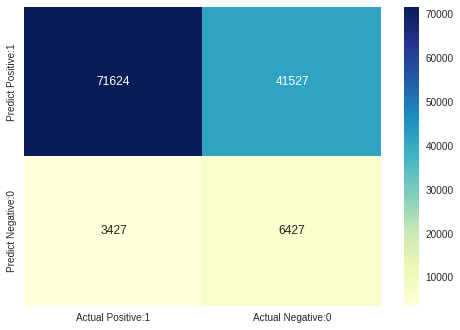

In [15]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [16]:
fone_scorer = make_scorer(fbeta_score,
                          beta=1,
                          greater_is_better = True,
                          pos_label=0)

In [17]:
from sklearn.model_selection import GridSearchCV

grid_values = {'penalty': ['l1', 'l2'],'C':[0.001,.009,0.01,.09,1,5,10,25]}
grid_clf_acc = GridSearchCV(lr, param_grid = grid_values,scoring = fone_scorer)
grid_clf_acc.fit(X_train_smtomek, y_train_smtomek)

#Predict values based on new parameters
y_pred_acc = grid_clf_acc.predict(X_test_smtomek)

# New Model Evaluation metrics 
print('Accuracy Score : ' + str(accuracy_score(y_test_smtomek,y_pred_acc)))
print('Precision Score : ' + str(precision_score(y_test_smtomek,y_pred_acc)))
print('Recall Score : ' + str(recall_score(y_test_smtomek,y_pred_acc)))
print('F1 Score : ' + str(f1_score(y_test_smtomek,y_pred_acc)))

#Logistic Regression (Grid Search) Confusion matrix
confusion_matrix(y_test_smtomek,y_pred_acc)

Accuracy Score : 0.6346652575098574
Precision Score : 0.13405373831775702
Recall Score : 0.6521209661051349
F1 Score : 0.22239141720020764


array([[71641, 41510],
       [ 3428,  6426]])

In [18]:
import sklearn.metrics as metrics

In [19]:
auc_roc=metrics.classification_report(y_test_smtomek,pred_test)
auc_roc

'              precision    recall  f1-score   support\n\n           0       0.95      0.63      0.76    113151\n           1       0.13      0.65      0.22      9854\n\n    accuracy                           0.63    123005\n   macro avg       0.54      0.64      0.49    123005\nweighted avg       0.89      0.63      0.72    123005\n'

In [20]:
auc_roc=metrics.roc_auc_score(y_test_smtomek,pred_test)
auc_roc

0.6426086476649995

In [21]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_smtomek, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.6902579841539989

Text(0.5, 0, 'False Positive Rate')

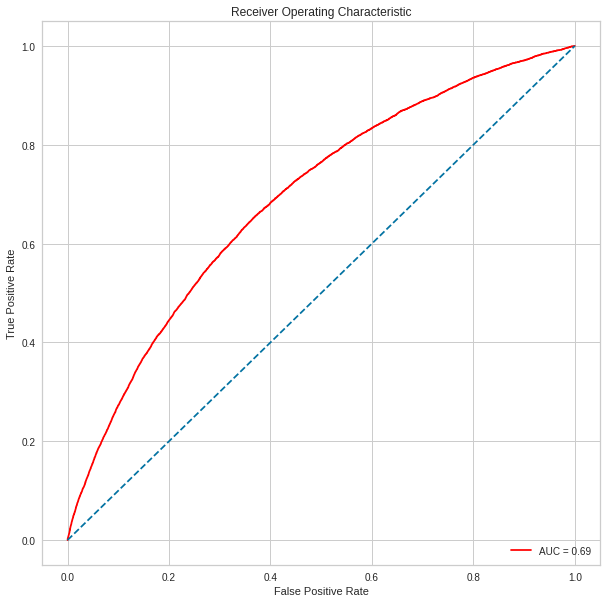

In [22]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [23]:
fone_scorer = make_scorer(fbeta_score,
                          beta=10,
                          
                          pos_label=0)

In [24]:
from sklearn.model_selection import GridSearchCV

grid_values = {'penalty': ['l1', 'l2'],'C':[0.001,.009,0.01,.09,1,5,10,25]}
grid_clf_acc = GridSearchCV(lr, param_grid = grid_values,scoring = fone_scorer)
grid_clf_acc.fit(X_train_smtomek, y_train_smtomek)

#Predict values based on new parameters
y_pred_acc = grid_clf_acc.predict(X_test_smtomek)

# New Model Evaluation metrics 
print('Accuracy Score : ' + str(accuracy_score(y_test_smtomek,y_pred_acc)))
print('Precision Score : ' + str(precision_score(y_test_smtomek,y_pred_acc)))
print('Recall Score : ' + str(recall_score(y_test_smtomek,y_pred_acc)))
print('F1 Score : ' + str(f1_score(y_test_smtomek,y_pred_acc)))

#Logistic Regression (Grid Search) Confusion matrix
confusion_matrix(y_test_smtomek,y_pred_acc)

Accuracy Score : 0.6346652575098574
Precision Score : 0.13405373831775702
Recall Score : 0.6521209661051349
F1 Score : 0.22239141720020764


array([[71641, 41510],
       [ 3428,  6426]])

In [25]:
import pickle

In [26]:
#pickle_out = open(PATH + "lr.pkl", "wb")
#pickle.dump(lr, pickle_out)
#pickle_out.close()